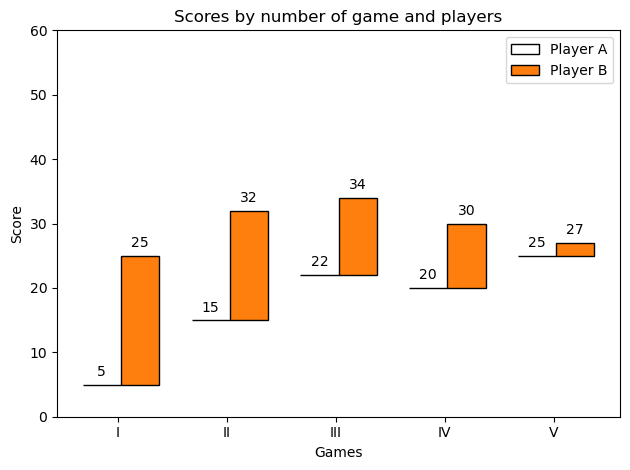

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


# initialise labels and a numpy array make sure you have
# N labels of N number of values in the array
xlabels = ['I', 'II', 'III', 'IV', 'V']
playerA = np.array([5, 15, 22, 20, 25])
playerB = np.array([25, 32, 34, 30, 27])

fig, ax = plt.subplots()
hat_graph(ax, xlabels, [playerA, playerB], ['Player A', 'Player B'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Games')
ax.set_ylabel('Score')
ax.set_ylim(0, 60)
ax.set_title('Scores by number of game and players')
ax.legend()

fig.tight_layout()
plt.show()